In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('/content/bank-additional-full.csv',sep=";")

In [52]:
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [53]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [54]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

**Preprocessing the data**

In [56]:
df["job"] = df["job"].astype('category')
df["marital"] = df["marital"].astype('category')
df["education"] = df["education"].astype('category')
df["default"] = df["default"].astype('category')
df["housing"] = df["housing"].astype('category')
df["loan"] = df["loan"].astype('category')
df["contact"] = df["contact"].astype('category')
df["month"] = df["month"].astype('category')
df["day_of_week"] = df["day_of_week"].astype('category')
df["poutcome"] = df["poutcome"].astype('category')
df["y"] = df["y"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null category
marital           41188 non-null category
education         41188 non-null category
default           41188 non-null category
housing           41188 non-null category
loan              41188 non-null category
contact           41188 non-null category
month             41188 non-null category
day_of_week       41188 non-null category
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null category
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null category
dtypes: category(11), float64

In [57]:
df.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

In [58]:
X = df.iloc[:,:-1]
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [59]:
y = df.iloc[:,-1]
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: category
Categories (2, object): [no, yes]

In [0]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore')
X = onehotencoder.fit_transform(X).toarray()

In [61]:
X

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [63]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [65]:
y_train.shape[0]

28831

In [66]:
X_train.shape[0]

28831

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [0]:
clf = DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='random')

In [0]:
clf_1 = DecisionTreeClassifier(random_state=0,max_depth=8,min_samples_split=5)

In [0]:
clf_2 = DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_split=2,criterion='entropy',splitter='random')

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import AdaBoostClassifier

In [0]:
adab = AdaBoostClassifier( DecisionTreeClassifier(),n_estimators=300, random_state=0)

In [73]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')

In [0]:
y_pred = clf.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred)

0.8834668608885652

In [76]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[10453   516]
 [  924   464]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     10969
           1       0.47      0.33      0.39      1388

    accuracy                           0.88     12357
   macro avg       0.70      0.64      0.66     12357
weighted avg       0.87      0.88      0.87     12357



In [77]:
clf_1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
y_pred1 = clf_1.predict(X_test)

In [79]:
accuracy_score(y_test, y_pred1)

0.8973051711580481

In [80]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test,y_pred1))

[[10778   191]
 [ 1078   310]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10969
           1       0.62      0.22      0.33      1388

    accuracy                           0.90     12357
   macro avg       0.76      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357



In [81]:
adab.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [0]:
y_pred2 = adab.predict(X_test)

In [83]:
accuracy_score(y_test, y_pred2)

0.8816055676944242

In [84]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test,y_pred2))

[[10353   616]
 [  847   541]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     10969
           1       0.47      0.39      0.43      1388

    accuracy                           0.88     12357
   macro avg       0.70      0.67      0.68     12357
weighted avg       0.87      0.88      0.88     12357



In [0]:
# K-fold CV

In [0]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=clf_1,X = X_train,y=y_train,cv=10,n_jobs=-1)
accuracies1 = cross_val_score(estimator=adab,X = X_train,y=y_train,cv=10,n_jobs=-1)


In [39]:
print(accuracies)

[0.89528433 0.88865765 0.90183836 0.90253208 0.89871661 0.89212626
 0.89941034 0.8917794  0.90391953 0.89941034]


In [40]:
print(accuracies1)

[0.88280166 0.87096774 0.87617066 0.87894554 0.88831079 0.86749913
 0.88414846 0.88796393 0.87027402 0.87963926]


In [41]:
print(accuracies.mean())
print(accuracies1.mean())

0.8973674892706445
0.8786721192624226


# Don't Run



# Learning Curves for Decision Tree and Boosting


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


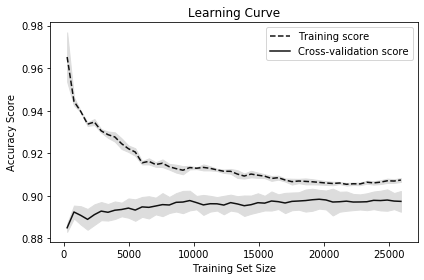

In [42]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(clf_1, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

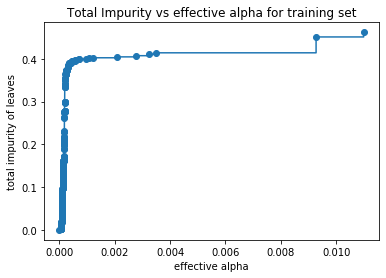

In [45]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [86]:
from sklearn.metrics import make_scorer,f1_score,fbeta_score
from sklearn.model_selection import GridSearchCV
# TODO: Initialize the classifier
#clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
#parameters = {"base_estimator__criterion" : ["gini", "entropy"],
#              "base_estimator__splitter" :   ["best", "random"],'max_depth':[2,4,6,8],
#              'min_samples_leaf':[2,4,6,8], 'min_samples_split':[2,4,6]}
param_grid = {"criterion" : ['gini', 'entropy'],
              'max_depth':[2,5,8],
              'min_samples_split':[2,4,6]              
             }
#parameters = {'max_features':[1],'n_estimators':[10,12]}
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
#grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_obj = GridSearchCV(clf, param_grid, scoring=scorer)
# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
print(best_clf)
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')
Unoptimized model
------
Accuracy score on testing data: 0.8835
F-score on testing data: 0.4371

Optimized Model
------
Final accuracy score on the testing data: 0.8968
Final F-score on the testing data: 0.4529


In [0]:
from sklearn.metrics import make_scorer,f1_score,fbeta_score
from sklearn.model_selection import GridSearchCV
# TODO: Initialize the classifier
#clf = DecisionTreeClassifier(random_state=42)
DTC = DecisionTreeClassifier(random_state = 11)

ABC = AdaBoostClassifier(base_estimator = DTC)
# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

parameters = {'n_estimators':[10,12],'learning_rate':[0.3,0.8,1.0]}
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(adab, parameters, scoring=scorer)
#grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
print(best_clf)
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

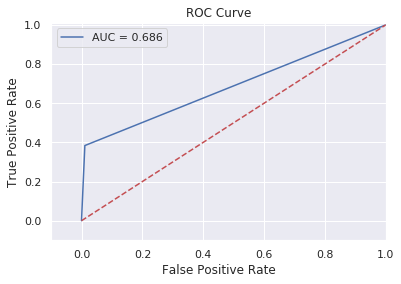

In [88]:
from sklearn.metrics import roc_curve,auc
#from sklearn import metrics
def roc_auc(y_test,y_pred):
    sns.set()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
    roc_auc = auc(fpr,tpr)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend()
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
roc_auc(predictions,y_test)

In [0]:
from sklearn.metrics import roc_curve,auc
#from sklearn import metrics
def roc_auc(y_test,y_pred):
    sns.set()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
    roc_auc = auc(fpr,tpr)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend()
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
roc_auc(predictions,y_test)